# Data Loading

In [680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [681]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [682]:
data = pd.concat([train, test], axis=0)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Exploratory Data Analysis

In [683]:
print(f"Train shape is {train.shape}")
print(f"Test shape is {test.shape}")
print(f"Only {set(train.columns) - set(test.columns)} column is missing in test set")
print(f"Data shape is {data.shape}")

Train shape is (1460, 81)
Test shape is (1459, 80)
Only {'SalePrice'} column is missing in test set
Data shape is (2919, 81)


In [684]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [685]:
# manually determine binary, nominal, ordinal and continuous features using data_description.txt
binary_features = ['Street', 'CentralAir']
nominal_features = ['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MoSold']
continuous_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

In [686]:
# check for collusion between feature sets
print(set(nominal_features) & set(ordinal_features))
print(set(nominal_features) & set(continuous_features))
print(set(ordinal_features) & set(continuous_features))
print(set(data.columns) - set(binary_features) - set(nominal_features) - set(ordinal_features) - set(continuous_features))

set()
set()
set()
{'SalePrice', 'Id'}


In [687]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

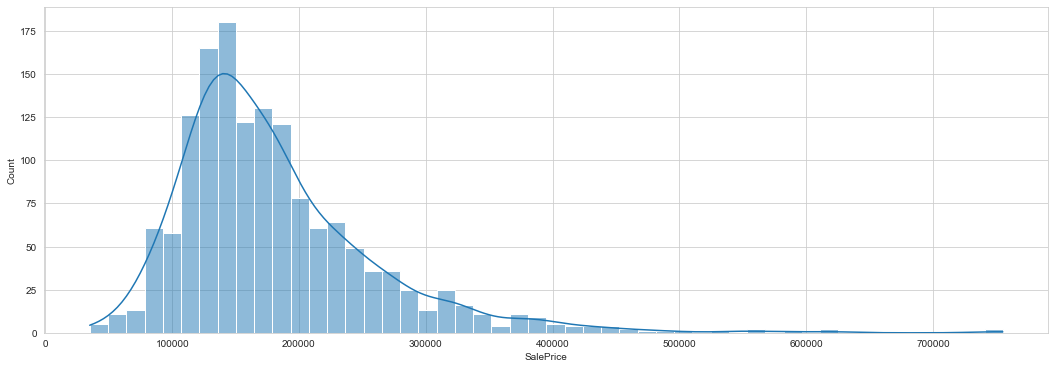

In [688]:
# draw histogram of target variable
plt.figure(figsize=(18, 6))
sns.histplot(train['SalePrice'], kde=True, bins=50)

# Data Preprocessing

### Imputation and Encoding

<AxesSubplot: >

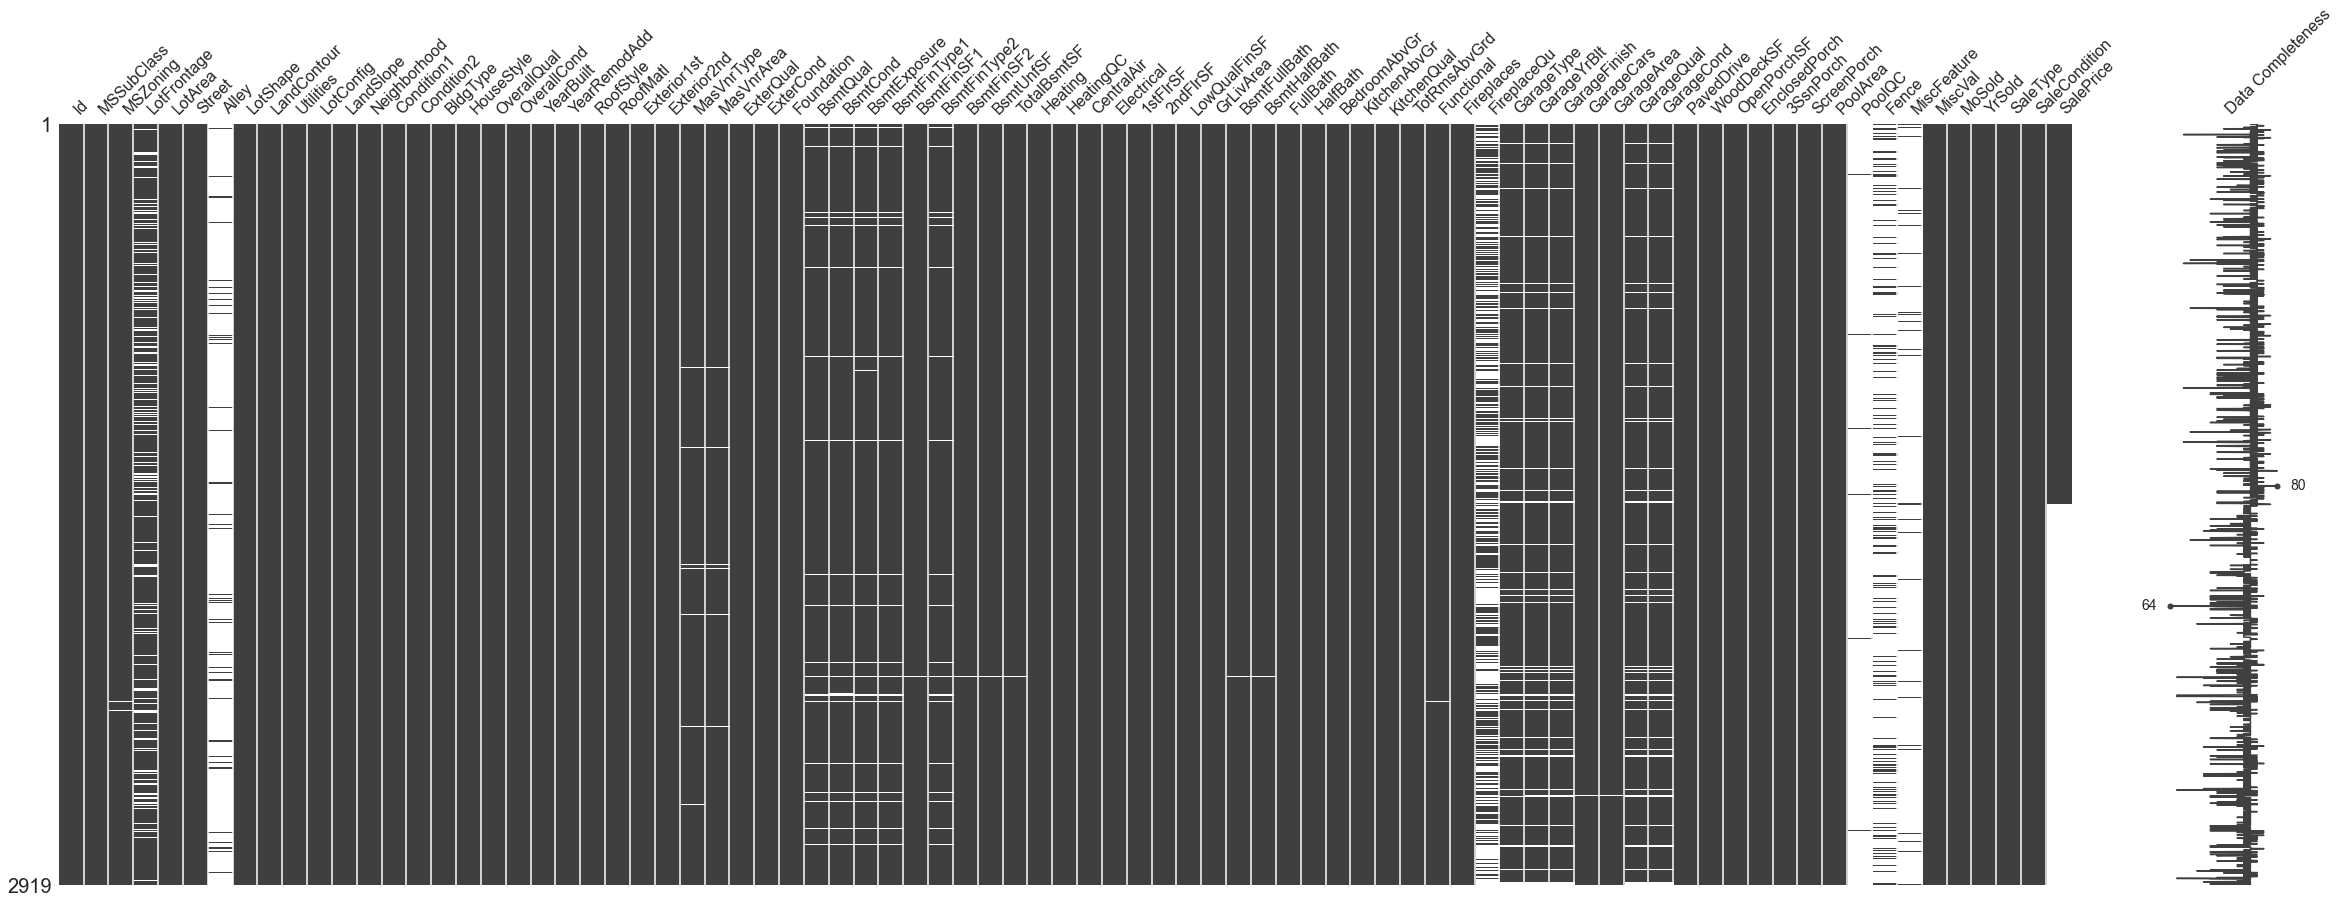

In [689]:
import missingno as msno
msno.matrix(data, figsize=(40, 14), labels=True)

<AxesSubplot: >

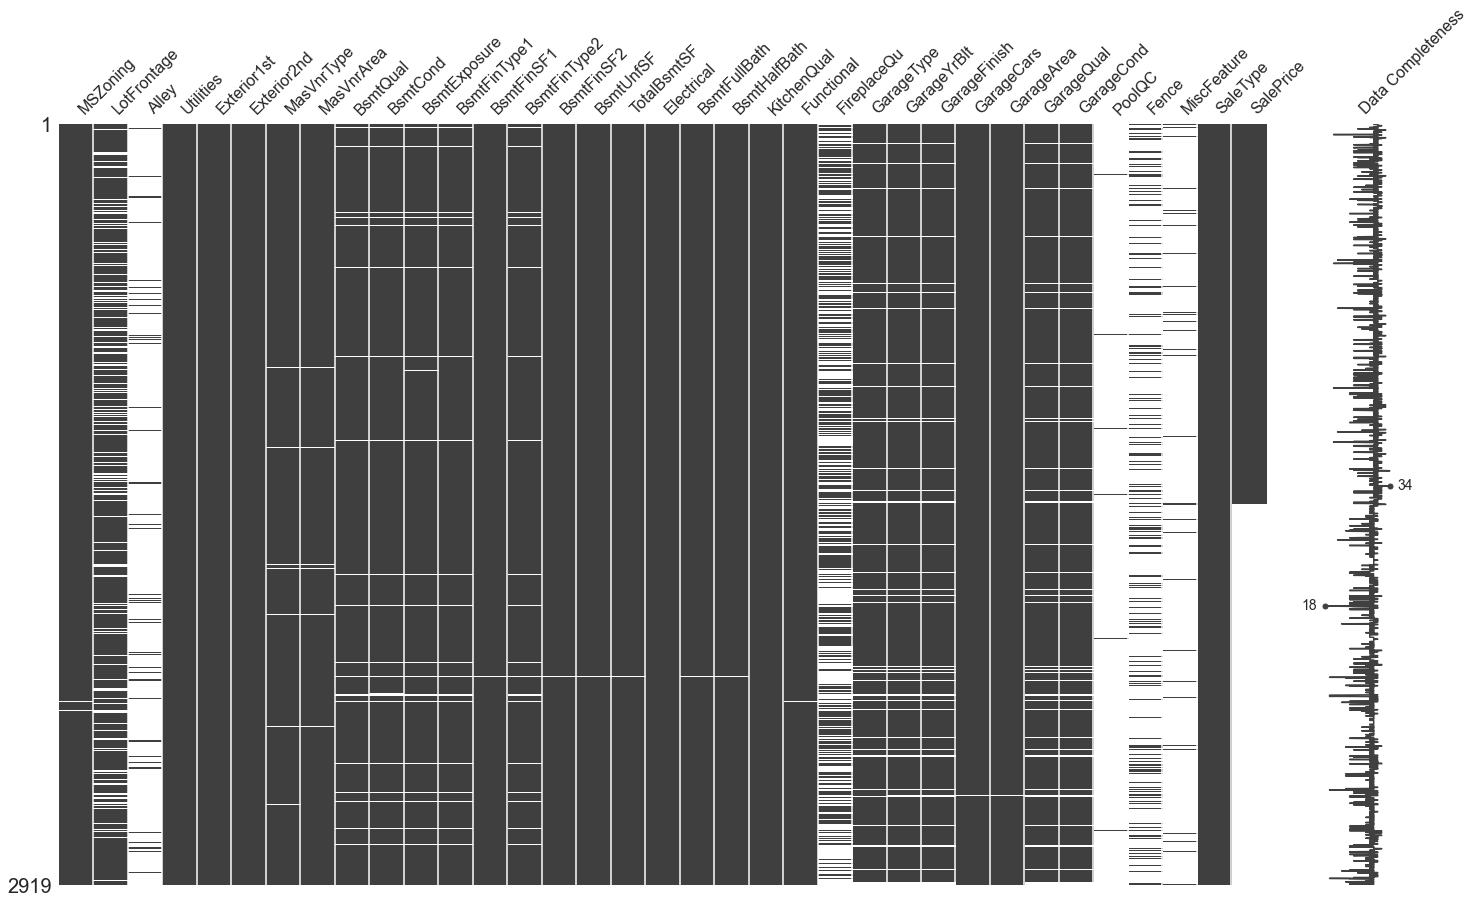

In [690]:
missing_cols = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missing_cols], figsize=(24, 14), labels=True)

In [691]:
# list columns with missing values
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [692]:
# label encode binary and ordinal features (this also assigns a category to missing values)
from sklearn.preprocessing import LabelEncoder
for col in binary_features + ordinal_features:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

In [693]:
# impute missing values of numerical features with zero
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
data[continuous_features] = imputer.fit_transform(data[continuous_features])

In [694]:
# missing values in continuous features
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

MiscFeature    2814
Alley          2721
SalePrice      1459
GarageType      157
MasVnrType       24
MSZoning          4
Exterior1st       1
Exterior2nd       1
SaleType          1
dtype: int64

In [695]:
data.shape

(2919, 81)

In [696]:
data.columns[data.columns.str.contains('Alley')]

Index(['Alley'], dtype='object')

In [697]:
# one hot encode nominal features, drop original columns and add to data
data = pd.get_dummies(data, columns=['Alley'], drop_first=True)

In [698]:
data.shape

(2919, 81)

In [699]:
# filter columns with name 'Alley' in it
data.columns[data.columns.str.contains('Alley')]

Index(['Alley_Pave'], dtype='object')

In [701]:
data.isna().sum().sort_values(ascending=False)

MiscFeature      2814
SalePrice        1459
GarageType        157
MasVnrType         24
MSZoning            4
Exterior2nd         1
Exterior1st         1
SaleType            1
Functional          0
GarageCars          0
GarageFinish        0
GarageYrBlt         0
FireplaceQu         0
Fireplaces          0
Id                  0
TotRmsAbvGrd        0
KitchenQual         0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
KitchenAbvGr        0
GarageArea          0
2ndFlrSF            0
PoolArea            0
SaleCondition       0
YrSold              0
MoSold              0
MiscVal             0
Fence               0
PoolQC              0
ScreenPorch         0
GarageQual          0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
LowQualFinSF        0
CentralAir          0
1stFlrSF            0
Neighborhood        0
YearBuilt 

In [700]:
asd

NameError: name 'asd' is not defined

### Scaling

In [ ]:
# minmax scale continuous features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [ ]:
data[continuous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.0,0.184558,0.106970,0.0,0.137380,0.201278,0.249201,1.0
LotArea,2919.0,0.041450,0.036865,0.0,0.028877,0.038108,0.048003,1.0
YearBuilt,2919.0,0.719658,0.219503,0.0,0.590580,0.731884,0.934783,1.0
YearRemodAdd,2919.0,0.571075,0.348239,0.0,0.250000,0.716667,0.900000,1.0
MasVnrArea,2919.0,0.063373,0.111784,0.0,0.000000,0.000000,0.102188,1.0
BsmtFinSF1,2919.0,0.078184,0.080724,0.0,0.000000,0.065202,0.129872,1.0
BsmtFinSF2,2919.0,0.032481,0.110864,0.0,0.000000,0.000000,0.000000,1.0
BsmtUnfSF,2919.0,0.239974,0.188181,0.0,0.094178,0.199914,0.344606,1.0
TotalBsmtSF,2919.0,0.172081,0.072196,0.0,0.129787,0.161866,0.213093,1.0
1stFlrSF,2919.0,0.173405,0.082412,0.0,0.113842,0.157110,0.221277,1.0


# Model and Submission

In [ ]:
# split data back into train and test sets
train = data[data['Id'].isin(train['Id'])]
test = data[data['Id'].isin(test['Id'])]

In [ ]:
# train validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop(['Id', 'SalePrice'], axis=1), train['SalePrice'], test_size=0.2, random_state=42)

In [ ]:
%%script echo skipped
# train XGBoost model
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

skipped


In [ ]:
#%%script echo skipped
# train catboost model
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

<AxesSubplot: xlabel='importance', ylabel='feature'>

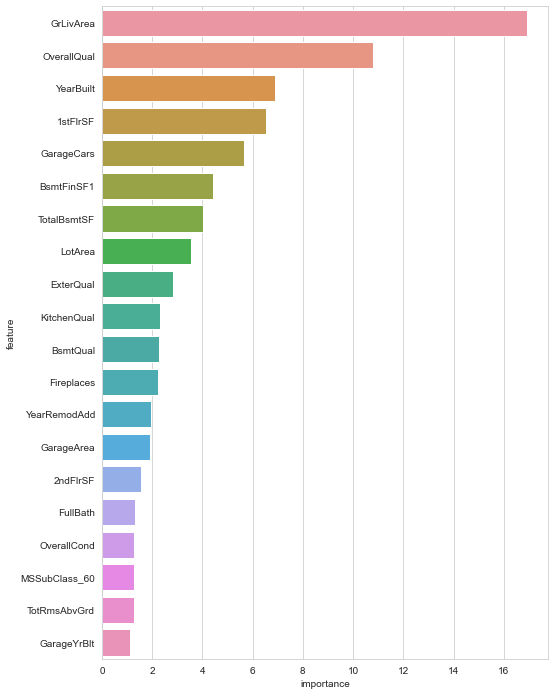

In [ ]:
# plot feature importance in descending order using seaborn
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
plt.figure(figsize=(8, 12))
sns.barplot(x='importance', y='feature', data=feature_importance.iloc[:20])

Train RMSE: 5196.250800033244
Valid RMSE: 28872.53684344624


Text(0.5, 1.0, 'Actual vs Predicted')

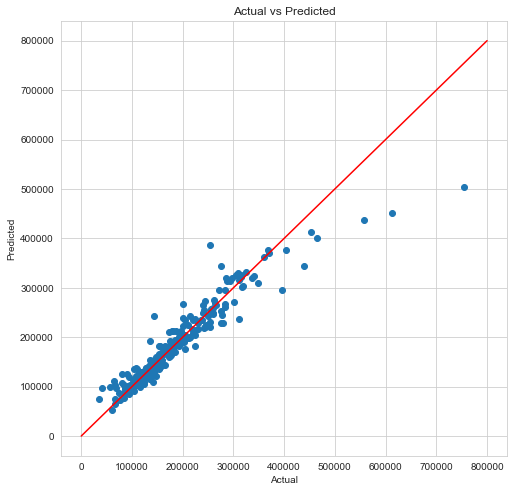

In [ ]:
# show performance metrics on train and validation sets
from sklearn.metrics import mean_squared_error
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}")
print(f"Valid RMSE: {np.sqrt(mean_squared_error(y_val, model.predict(X_val)))}")

# plot predicted vs actual values and add 45 degree line
plt.figure(figsize=(8, 8))
plt.scatter(y_val, model.predict(X_val))
plt.plot([0, 800000], [0, 800000], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
# make predictions on test set
test['SalePrice'] = model.predict(test.drop(['Id', 'SalePrice'], axis=1))

# save predictions to csv file
test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

/var/folders/_z/2mpxzfyd0qq38y_d0f88n8jc0000gn/T/ipykernel_39270/452281177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SalePrice'] = model.predict(test.drop(['Id', 'SalePrice'], axis=1))
